In [1]:
# CSV Reader
# ==============================================================================
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 2.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

cases = pd.read_csv('covidcases.csv')

cases['date'] = pd.to_datetime(cases['date'], format='%Y/%m/%d')
cases = cases.set_index('date')

cases = cases.asfreq('SMS') 
cases = cases.sort_index()

cases


,hospitalCases,newDailyNsoDeathsByDeathDate
date,,
2020-04-01,13637,924
2020-04-15,20582,1276
2020-05-01,14723,786
2020-05-15,10691,421
2020-06-01,7247,199
...,...,...
2022-08-01,12857,90
2022-08-15,10021,86
2022-09-01,6957,42


In [2]:
(cases.index == pd.date_range(start=cases.index.min(),
                             end=cases.index.max(),
                              freq=cases.index.freq)).all()



True

Train dates : 2020-04-01 00:00:00 --- 2021-07-01 00:00:00  (n=31)
Test dates  : 2021-07-15 00:00:00 --- 2022-10-01 00:00:00  (n=30)


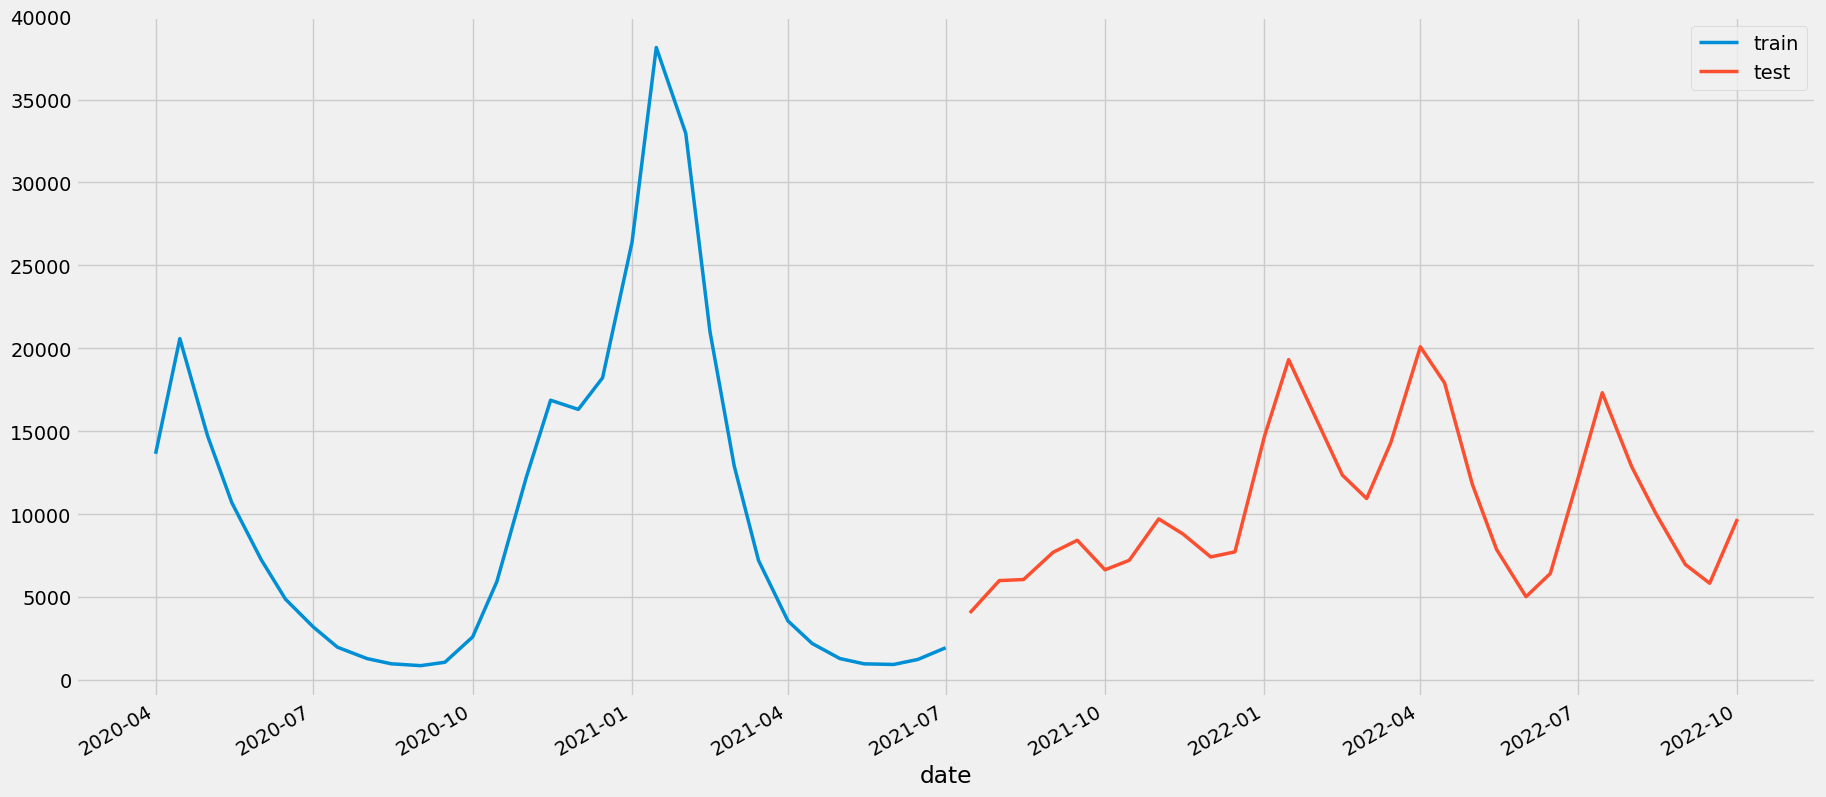

In [3]:
steps = 30
data_train = cases[:-steps]
data_test  = cases[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(20, 10))
data_train['hospitalCases'].plot(ax=ax, label='train')
data_test['hospitalCases'].plot(ax=ax, label='test')
ax.legend();

In [4]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 6
             )

forecaster.fit(y=data_train['hospitalCases'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2020-04-01 00:00:00'), Timestamp('2021-07-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: SMS-15 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-11-05 11:58:42 
Last fit date: 2022-11-05 11:58:42 
Skforecast version: 0.5.1 
Python version: 3.10.8 

In [5]:
steps = 30
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2021-07-15     4910.11
2021-08-01     8087.19
2021-08-15    10182.06
2021-09-01    12542.00
2021-09-15    12797.11
Freq: SMS-15, Name: pred, dtype: float64

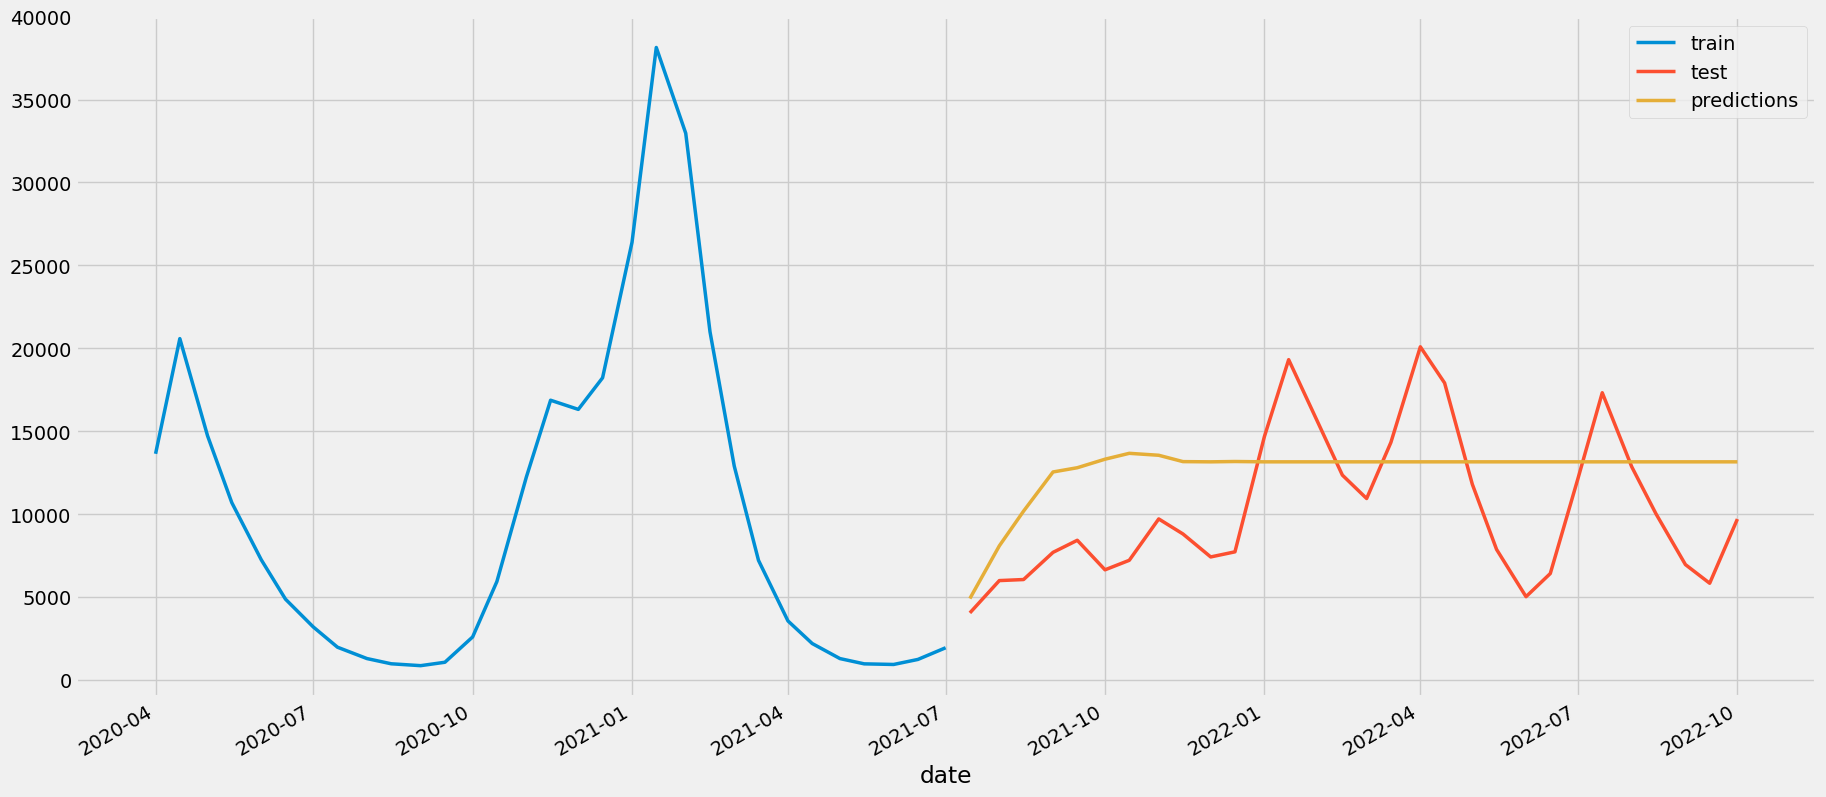

In [6]:
fig, ax=plt.subplots(figsize=(20, 10))
data_train['hospitalCases'].plot(ax=ax, label='train')
data_test['hospitalCases'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')

ax.legend();